hi<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2020 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday October 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The practicum is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [1]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [50 points] Problem 1: Elections

# The Election of 1800
### Can we get back to politics? 

source of inspiration: https://en.wikipedia.org/wiki/1800_United_States_presidential_election

These are interesting times in United States politics. John Adams is serving as the second President, and political parties have formed the very first series of "tickets" for President and Vice President nominees. Every state has a different method of selecting electors for the Electoral College. And the idea of winning voter's hearts and minds through campaigning is becoming a pervasive idea. **The two main political parties are the Federalist and the Democratic-Republicans.**

## The Candidates

### Federalist Ticket
* John Adams - Massachusetts
* Charles Cotesworth Pinckney - South Carolina

### Democratic-Republican Ticket
* Thomas Jefferson - Virgina
* Aaron Burr - New York

## The Voters
**As observed in the data set `voters1800.csv`**

* CitizenID - an integer unique number (identifies their row in the table).
* Age - an integer representing years since birth.
* State - a string indentifying the location.
* Interest1 - a string identifying the voter's most important campaign issue.
* Interest2 - a string identifying the voter's second most important campaign issue.
* Interest3 - a string identifying the voter's third most important campaign issue.


### Part 1) A sampling of the voting population

#### Import the dataset...

Import the 'voters1800.csv' as given.

#### A) Getting to know the dataset:
Give a statistical description of the dataset you imported. Be sure to include:
* The number of voters in each State
    * The Tukey 5 Number Summary of age for voters in each state
* A description of the distribution of interests
    * Consider how to represent the distribution of first, second, and third interests
    * Consider the breakdown by state

Tukey 5 Number Summary for Voter Age: 18.0, 33.75, 49.5, 65.0, 80.0


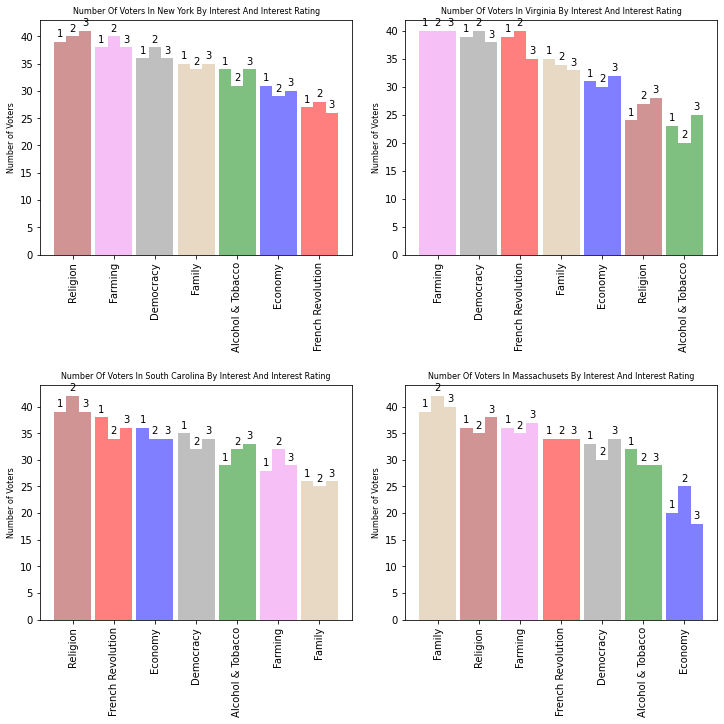

In [19]:
#Your code for 1A here
from matplotlib import pyplot as plt
#import itertools

ds = pd.read_csv("../data/voters1800.csv")

print(f"Tukey 5 Number Summary for Voter Age: {', '.join(str(ds['Age'].quantile(.25 * x)) for x in range(5))}")

#print(ds.head())
colors = ["red", "green", "blue", "violet", "tan", "grey", "brown"]
states = list(set(ds["State"]))
interests = list(set(ds["Interest1"]))

fig, axes = plt.subplots(nrows=2, ncols=2)
width = 0.3
for i, state, axis in zip(range(len(states)), states, axes.flatten()):
    #ibyage = pd.DataFrame()
    v1 = ds[ds["State"] == state]["Interest1"].value_counts()
    v2 = ds[ds["State"] == state]["Interest2"].value_counts()
    v3 = ds[ds["State"] == state]["Interest3"].value_counts()
    #print(vc)
    ncolors = [colors[interests.index(ist)] for ist in v1.axes[0]]
    r1 = axis.bar(np.arange(7) - width, v1, width, alpha=0.5, color=ncolors)
    r2 = axis.bar(np.arange(7), v2, width, alpha=0.5, color=ncolors)
    r3 = axis.bar(np.arange(7) + width, v3, width, alpha=0.5, color=ncolors)
    
    for i, rects in enumerate([r1, r2, r3]):
        for rect in rects:
            axis.annotate(
                str(i + 1), xy =(rect.get_x() + rect.get_width()/2, rect.get_height()),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom'
            )
        
    
    axis.set_ylabel('Number of Voters', fontsize=8)
    axis.set_xticks(np.arange(len(v1.axes[0])))
    axis.set_xticklabels(list(v1.axes[0]), rotation='vertical')

    axis.set_title(f"Number of Voters in {state.title()} by Interest and Interest Rating".title(), fontsize=8)

fig.set_size_inches((10, 10))
plt.tight_layout(pad=0.5, w_pad=2, h_pad=2.0)
plt.show()

#### B) Model  baseline voting expecations 
Now that we have a pool of voters, let's model the baseline expectations for a vote.

For clarification, the Electoral College is a part of the process by which the United States votes for the president and vice-president. Each state has a certain number of "electoral votes" based on their populations (states with lower populations have less votes: today, states like Wyoming and Montana have 3 electoral college votes, while California has 55 electoral college votes because it is the state with the highest population) and these votes are cast based on the popular vote - how many voters voted for each politician. In some states, the electoral vote is decided by state-wide plurality - whoever gets the most votes in the entire state gets all of the electoral college votes (winner-take-all). In other states, each electoral college vote is associated with a electoral district and whoever has the most votes in each district takes that point. Though some details have changed, the electoral college operates in much the same way today as it did back in 1800!

Given the following assumptions:

* Each voter makes their decision independently of other voters


* With no other information, each voter is equally likely to vote for one party or the other
    * : i.e. P(Federalist) = P(Democratic-Republican)
   
   
* If a voter is from the same state as one of the presidential nominees, there is an additional **0.1** likelihood that they will vote for that nominee's party 
    * * i.e. if the Federalist president nominee is Ella Sarder from Wisconsin, voters from Wisconsin are 0.1 percent more likely to vote for the Federalists than the average voter. (At this point, they would be 50.1% to Federalist, 49.9% to D-R).
    
    
* If a voter is from the same states as one of the vice-presidental nominees, there is an additional **0.05** likelihood that they will vote for that nominee's party.


* Each state is responsible for a different number of Electoral College votes: 
    * Massachusetts has **16 votes**, and is split by electoral districts
        * Assume an even split among voters 
    * New York has **12 votes** and is Winner-Take-All
    * Virginia has **21 votes** and is split by electoral districts
        * Assume an even split among voters
    * South Carolina has **8 votes** and is Winner-Take-All
    
NOTE: South Carolina delegates were actually chosen by the state legislature, but that doesn't allow us to create such an interesting problem!

What is the expected outcome for an election in these four states? How many electoral college votes will each party ticket receive?

In [20]:
# P(F_ms) = 50.1
# P(F_ny) = 49.95
# P(F_vi) = 49.9
# P(F_sc) = 50.05

print(f"Massachusetts delegates:  {.501 * 16:.0f} Federalist and  {.499 * 16:.0f} D-R")
print(f"New York delegates:       {round(.4995) * 12:} Federalist and  {round(.5005) * 12} D-R")
print(f"Virginia delegates:       {.499 * 21:.0f} Federalist and {.501 * 21:.0f} D-R")
print(f"South Carolina delegates: {round(.5005) * 8:} Federalist and  {round(.4995) * 8} D-R")


Massachusetts delegates:  8 Federalist and  8 D-R
New York delegates:       0 Federalist and  12 D-R
Virginia delegates:       10 Federalist and 11 D-R
South Carolina delegates: 8 Federalist and  0 D-R


#### C) Electioneering
Of course, this election was really the first one with full-fledged political campaigns, attempting to sway voters with rhetoric and communication. You will play the role of the press secretary for a campaign, leading these efforts. Let's set up a series of rules for how you can influence the election:

* **You can only write one article per day.** Each article can only **cover one Interest**, and can only be **run in one State**. You have to tailor what you write to that population!


* Running a piece in a newspaper will appease voters in that state...
    * If the article is about a voter's **number 1 interest**, it adds **0.3** to the likelihood they will vote for your party.
    * If the article is about a voter's **number 2 interest**, it adds **0.2** to the likelihood they will vote for your party.
    * If the article is about a voter's **number 3 interest**, it adds **0.1** to the likelihood they will vote for your party.
    * If the article is about something a voter has **no interest** in, it only adds **0.02** to the likelihood they will vote for your party, because you are focusing on their state.
    
    
* Running a piece in a newspaper will also dissatisfy voters in other states...
    * The voters in other states will **lose 0.01** to the probability that they will vote for your party, because you are ignoring them.
    
    
* Some topics are big in certain areas!
    * No matter which newspaper you're writing in, news of articles about **Farming** will trickle down to the South (**Virginia and South Carolina**) and will **add 0.02** to the likelihood all voters there will vote for your party.   
    * No matter which newspaper you're writing in, news of articles about the **Economy** will trickle down to the North (**New York and Massachusetts**) and will **add 0.02** to the likelihood all voters there will vote for your party.
    
    
* Some topics are big with certain demographics!
    * No matter a voter's listed interests, writing about the **French Revolution** will **add .05** to the likelihood for **all voters Age 30** or under in any Region (North or South).
    
    * No matter a voter's listed interests, writing about **Alcohol & Tobacco** will **add 0.05** to the likelihood for **all voters Age 60 or above** in any Region (North or South).
    
#### Designing your Campaign Strategy
* You have 30 days to maximize your gains and try to win the election. What is your strategy if
    * you are the Democratic-Republican Ticket?
    * you are the Federalist Ticket?
* Do you manage to win, considering your opponent does nothing?
* Assume that if you somehow manage to add 50 or more likelihood to a single voter  (from 50%), then their P(vote) stops at 100%.

In [26]:
ds["fchance"] = ds["State"].apply({"Massachusets": .501, "New York": .4995, "Virginia": .499, "South Carolina": .5005}.get)
kds = ds.copy()

topics = list(set(ds["Interest1"]))

def sim_state(state):
    tc, fc = 0, 0
#     print(13313, state)
    svoters = ds[ds["State"] == state]
    for _, voter in svoters.iterrows():
#         print(voter)
        if random.random() < voter["fchance"]:
            fc += 1
        tc += 1
    
    if state == "Massachusets":
        return round(fc / tc * 16)
    elif state == "New York":
        return round(fc / tc) * 12
    elif state == "Virginia":
        return round(fc / tc * 21)
    else:
        return round(fc / tc) * 8
        

def get_simulated_delegates(fed):
#     print(states)
    votes = sum(sim_state(state) for state in states)
    return votes if fed else (16 + 12 + 21 + 8) - votes

def get_delegates(fed):
    ms = round(mean_state("Massachusets", fed) * 16)
    ny = round(mean_state("New York", fed)) * 12
    va = round(mean_state("Virginia", fed) * 21)
    sc = round(mean_state("South Carolina", fed)) * 8
    
    return ms + ny + va + sc

def mean_state(state, fed):
    if fed:
        return ds[ds["State"] == state]["fchance"].mean()
    return 1 - ds[ds["State"] == state]["fchance"].mean()
    
def best_topic(state):
    sdata = ds[ds["State"] == state]
    scores = []
    for topic in topics:
        score = 0
        score += 0.3 * len(sdata[sdata["Interest1"] == topic])
        score += 0.2 * len(sdata[sdata["Interest2"] == topic])
        score += 0.1 * len(sdata[sdata["Interest3"] == topic])
        
        if topic == "French Revolution":
            score += 0.05 * len(sdata[sdata["Age"] <= 30])
            
        if topic == "Alcohol & Tobacco":
            score += 0.05 * len(sdata[sdata["Age"] >= 60])
            
        scores.append((topic, score))
        
    return max(scores)
    
def choose_article(fed):
    if mean_state("New York", fed) < 0.6:
        return "New York", best_topic("New York")[0]
        
    if mean_state("South Carolina", fed) < 0.6:
        return "South Carolina", best_topic("South Carolina")[0]
    
    btny, sny = best_topic("New York")
    btsc, ssc = best_topic("South Carolina")
    bny = mean_state("Massachusets", fed) * sny
    bsc = mean_state("Virginia", fed) * ssc
    
    if bny > bsc:
        return "Massachusets", btny
    else:
        return "Virginia", ssc

def adjust_score(cid, state, topic):
    row = ds.loc[cid]
    score = row["fchance"]
    if row["State"] == state:
        if row["Interest1"] == topic:
            score += 0.3
        elif row["Interest2"] == topic:
            score += 0.2
        elif row["Interest3"] == topic:
            score += 0.1
        else:
            score += 0.02
    else:
        score -= 0.01
        
    if topic == "Farming":
        if state in ("Virginia", "South Carolina"):
            score += 0.2
    elif topic == "Economics":
        if state in ("New York", "Massachusets"):
            score += 0.2
            
    return min(score, 1)
    
fed = True
def run_day():
    state, topic = choose_article(fed)
    ds["fchance"] = ds["CitizenID"].apply(lambda cid: adjust_score(cid, state, topic))
    
print(f"Start Electoral Votes: {get_delegates(fed)}")
print(f"Simulated Start Electoral Votes: {get_simulated_delegates(fed)}")
for i in range(30):
    run_day()
    
print(f"End Electoral Votes: {get_delegates(fed)}")  
print(f"Simulated End Electoral Votes: {get_simulated_delegates(fed)}")

Start Electoral Votes: 26
Simulated Start Electoral Votes: 17
End Electoral Votes: 38
Simulated End Electoral Votes: 38


The tactic is to prioritize take-all states when possible, and only account for age and interests in our calculations. We make the assumption that the number of delegates we are most likely to get is equal to the average chance of each voter voting for us times the number of votes up for grabs, with take-all's applied. Take-all state priority yielded 4 more delegates on average than prioritizing individually allocated states. We then find the best topic based on the topic that will yield the greatest average increase. The algorithm could be optimized by doing the following
- Accounting for side effects and trickling
- Weigh the state choosing by topic choice for that state versus total number of delegates to be gained
- Figure out how to weigh take-all vs individually allocated.

#### D) Electoral College Shifts

As elections wind down, you discover that some states have made changes to the ways their electoral colleges are selected! In particular...
* **Massachusetts** has delegated the power of selecting the Electoral College votes to the state legislature! Your campaign strategy is no longer relevant. They award **8 votes to the Democratic-Republican Ticket and 6 votes to the Federalist Ticket.**
* **Virginia is now a Winner-Take-All state.** Your campaign strategy better have worked, because 21 votes are now up for grabs!

Do these changes affect the outcomes from your original campaign strategy?

In [28]:
# Yes, they do, I will now prioritize Virginia like the other take-all states, and drop Mass. from the equations
# But the result is identical

def get_delegates(fed):
    ms = round(mean_state("Massachusets", fed) * 16)
    ny = round(mean_state("New York", fed)) * 12
    va = round(mean_state("Virginia", fed) * 21)
    sc = round(mean_state("South Carolina", fed)) * 8
    
    return ny + va + sc + (6 if fed else 8)

def sim_state(state):
    tc, fc = 0, 0
#     print(13313, state)
    svoters = ds[ds["State"] == state]
    for _, voter in svoters.iterrows():
#         print(voter)
        if random.random() < voter["fchance"]:
            fc += 1
        tc += 1
    
    if state == "Massachusets":
        return 6
    elif state == "New York":
        return round(fc / tc) * 12
    elif state == "Virginia":
        return round(fc / tc) * 21
    else:
        return round(fc / tc) * 8
        

def choose_article(fed):
    if mean_state("Virginia", fed) < 0.6:
        return "Virginia", best_topic("Virginia")[0]
    
    if mean_state("New York", fed) < 0.6:
        return "New York", best_topic("New York")[0]
        
    return "South Carolina", best_topic("South Carolina")[0]

ds = kds.copy()
print(f"Start Electoral Votes: {get_delegates(fed)}")
print(f"Simulated Start Electoral Votes: {get_simulated_delegates(fed)}")
for i in range(30):
    run_day()
    
print(f"Start Electoral Votes: {get_delegates(fed)}")
print(f"Simulated End Electoral Votes: {get_simulated_delegates(fed)}")

Start Electoral Votes: 24
Simulated Start Electoral Votes: 6
Start Electoral Votes: 38
Simulated End Electoral Votes: 47


<br>

---
[Back to top](#top)
<a id='p2'></a>

## [50 points] Problem 2: An Intro to Computational Epidemiology

### The Model

In this problem we introduce and begin to explore some of the baseline tools of computational epidemiology: the SIR and SI models.  

Note: There are a number of images in this problem.  If you can't get them to display properly, they are hosted at https://drive.google.com/drive/folders/1cZ2JZ2TiHja5qCpLTD2WVEh8tEM8pfU_?usp=sharing

These models exist on graphs, where vertices or nodes represent people, agents, or surfaces that might carry a communicable disease.  Edges connecting nodes represent nodes that are in close contact with one another, and at risk of exchanging the disease.  


We will implement a variant of the SIR model.  In this model, each vertex has one of three possible states:
 - **I** for Infected, and at risk of passing the disease to neighboring susceptible vertices.
 - **S** for Susceptible, and at risk of becoming infected by its neighbors
 - **R** for removed, and no longer at risk of contracting or spreading the infection.

The model evolves *iteratively*, where for each discrete time step (one unit of `time`) the following two calculations occur:

** Step 1:** First, consider all **edges** that connect an infected person to a susceptible person.  The susceptible vertex becomes infected with independent and identical probability $\beta$ *for each* edge that that connects them to an infected vertex.  This is depicted below in the SIR_Edges.png image.

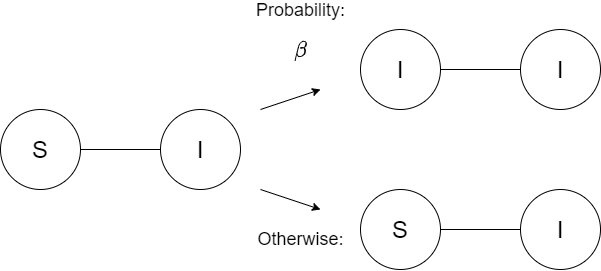

A susceptible edge can only be infected once, and is only at risk of being infected by nodes that were infected (**I**) at the *start* of each iteration: newly infected nodes don't pass the infection onwards until the next time step.

** Step 2: ** Next, consider all infected (**I**) **vertices** that were infected at the *start* of the time step - prior to step 1 - and consider them recovered **R** with probability $\gamma$.  This is depicted below in the SIR_Removal.png image.

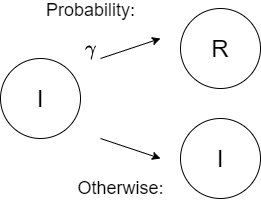

Think of this process as the probability of becoming well: not only are those ndoes no longer contagious, they also have developed antibodies that make them immune to re-infection!

The model can run for any number of time steps, but for reasonably small graphs we might expect to see the number of infections taper off to zero after a while.  If you watched any news coverage during the onset of COVID-19, one of the main tasks in predicting a pandemic is predicting the *basic reproduction number* $R_0= \frac{\beta}{\gamma}$ of the disease.  Since $\beta$ represents a rate of spread and $\gamma$ represents a rate of recovery, the ratio is important in determining whether a disease spreads faster than recovery can occur.

### Warmups

A couple of quick questions to make sure we're understanding the model and the roles of $\beta$ and $\gamma$.

Feel free to use office hours/piazza to ask more pointed questions about the Warmups **only** to make sure you understand the basics of the transition model before you approach the implementation section later.

**Part A**

Suppose we have the small system depicted at time $t=0$ below, in SIR_Warmup1.png.

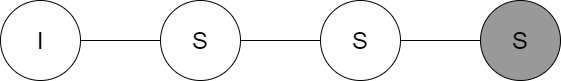

What is the exact probability that the last node on the right is an infected node **I** after exactly 3 time steps?  What is the exact probability that the leftmost node is still infected at this time?

$$P(R_{infected}) = \beta ^ 3$$
$$P(L_{infected}) = (1 - \gamma)^3$$

**Part B**

Suppose we consider the alternative 4-vertex graph depicted below, in SIR_Warmup2.png.

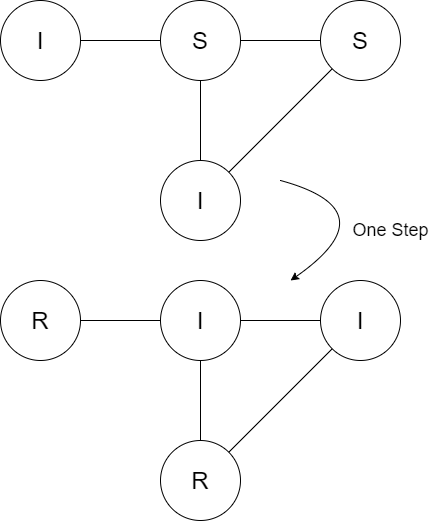

What is the exact probability that we transition from the graph on the top to the exact graph on the bottom in a single time step?  Note that the "center" **S** node with two infected neighbors should be more likely to end up infected than rightmost node.

$$P(S) = 2 \beta^2 \times \gamma^2$$

### Coding The Model

Enough with the exact pen-and-paper solutions!  Let's run this model.  Suppose we wish to implement the SIR model on the graph below (SIR_graph.png):

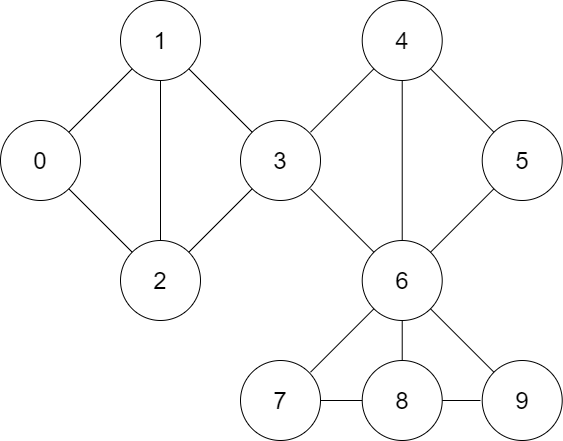

For your convenience, one way to represent this graph as a dictionary of neighbors is listed below.

`nodes` holds the 10 vertices, labelled by their indexes 0 through 9.
`neighbors` is a dictionary, where e.g. `neighbors[1]` holds the list of neighboring vertices to vertex #1.

In [6]:
nodes = list(range(10))
N = len(nodes)
neighbors = {0 : [1,2], 1 : [0,2,3], 2 : [0,1,3], 3 : [1,2,4,6], 4 : [3,5,6], 
             5 : [4,6], 6 : [3,4,5,7,8,9], 7 : [6,8], 8 : [6,7,9], 9 : [6,8]}

#Dictionary usage:
for node in neighbors:
    print('Node # ',node, ' has neighbors of ', neighbors[node])

Node #  0  has neighbors of  [1, 2]
Node #  1  has neighbors of  [0, 2, 3]
Node #  2  has neighbors of  [0, 1, 3]
Node #  3  has neighbors of  [1, 2, 4, 6]
Node #  4  has neighbors of  [3, 5, 6]
Node #  5  has neighbors of  [4, 6]
Node #  6  has neighbors of  [3, 4, 5, 7, 8, 9]
Node #  7  has neighbors of  [6, 8]
Node #  8  has neighbors of  [6, 7, 9]
Node #  9  has neighbors of  [6, 8]


**Part C:**

Implement a function **SIR_step(states, gamma, beta)** that takes one step of the SIR model with a known $\beta$ and $\gamma$ on the graph given above.

* **initial_state** should be a list of length 10 of the state of each vertex, e.g. [S,S,S,I,I,S,S,S,S,I].
* **gamma** is the constant determining recovery rate.
* **beta** is the constant determining transmission rate.

The return of the function should be the new states for each vertex, in the same format as **initial_state**.

To actually implement this model, you may want to create a list of `edges` rather than just neighbors, because one way to implement one step 1 of the model is to loop over all edges.  Note that each edge should appear exactly once in this loop.


In [7]:
import random

def SIR_step(initial_state, gamma, beta):
    new_state = initial_state.copy()
    
    for i, state in enumerate(initial_state):
        if state == "I":
            new_state[i] = "R" if random.random() < gamma else "I"
            for neighbor in neighbors[i]:
                if initial_state[neighbor] == "S":
                    new_state[neighbor] = "I" if random.random() < beta else "S"
    
    return new_state

Run a couple of quick sanity checks and self-checks below:
 - what should happen if `states` contains no **I** nodes?
 - what should happen if `states` contains **I** nodes but $\beta=0$?


In [8]:
# No infected nodes
states = ["S"] * 10
for i in range(10):
    states = SIR_step(states, 0, 1)

assert states == ["S"] * 10

# 0% infection rate + 100% recovery rate
states = ["S"] * 9 + ["I"]
for i in range(10):
    states = SIR_step(states, 1, 0)

assert states == ["S"] * 9 + ["R"]

# 0% infection rate + 0% recovery rate
states = ["S"] * 9 + ["I"]
for i in range(10):
    states = SIR_step(states, 0, 0)

assert states == ["S"] * 9 + ["I"]

# 100% infection rate + 0% recovery rate
states = ["S"] * 9 + ["I"]
for i in range(10):
    states = SIR_step(states, 0, 1)

assert states == ["I"] * 10, states

Time to run the model for an initial set of states and describe what happens!  Suppose the initial states of each of the nodes is given by:

`states=[S, S, S, I, I, S, I, S, S, S]`

so nodes labelled 3, 4,  and 6 are infected.  


**Part D:**
Now we want to create a function or a loop that runs **SIR_step** for 500 time steps.  At each step, you should save the current state of each node (you may want to create a data frame to hold them, like `df_per_run`).  When we take 500 steps, this represents *one* example of what could happen when an infection is set loose in a small (compartmental) environment.  As data scientists, we need to run this 500-step experiment multiple times to understand the overall descriptors of our simulated pandemic!

Repeat this experiment 100 times (so you'll have 100 instances of 500 time steps) under 3 different sets of values of the constants $\gamma$ and $\beta$.  You'll want another data frame to save some aggregate descriptors of each run, like `df_overall`.  The three sets of conditions we should run experiments under are:

* First, when the values of $\gamma$ and $\beta$ are each 0.1.
* Second, when $\beta=0.2$ and $\gamma=0.05$.
* Finally, when $\beta=0.05$ and $\gamma=0.2$.

For each, you'll want to save the time step (if any) at which the infection ends and the time spend infected for each node.

In [9]:
import numpy as np
import pandas as pd

def run_500(istate, gamma, beta):
    #recommended per_run setup.  Put this in a loop/function:
    df_per_run=pd.DataFrame(data=None, columns=np.array(range(10)))
    df_per_run.loc[0,:]=istate
    df_per_run.head()

    #extract the following: time step at which infection ended, time spent infected for each node.
    #one idea: save in new df:
    # df_overall= #up to you!
    last = istate
    for i in range(500):
        last = SIR_step(last, gamma, beta)
        df_per_run = df_per_run.append([last])
        
    return df_per_run

runsa = []
runsb = []
runsc = []

# trial x 100 runs x set of 500 x individual row

for i in range(100):
    runsa.append(run_500(['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S'], 0.1, 0.1))
    runsb.append(run_500(['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S'], 0.05, 0.2))
    runsc.append(run_500(['S', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'S'], 0.2, 0.05))
    

**Part E:**

For each one of those 3 sets of experiments, report what proportion of the time was node 0 *never* infected?


In [10]:
#recommended output style:

for i, (t100, (beta, gamma)) in enumerate(zip([runsa, runsb, runsc], [(0.1, 0.1), (0.2, 0.05), (0.05, 0.2)])):
    # t100 = df_overall[i] #100 trials
    c = 0
    s = 0
    for t500 in t100:
        if t500.tail(1)[0][0] == "S":
            c += 1
            
        s += 1
    
    p_0s = c/s
    print('For β =',beta,' and γ =',gamma, f' observed node zero never infected {p_0s * 100:.2f}% of the time')

For β = 0.1  and γ = 0.1  observed node zero never infected 59.00% of the time
For β = 0.2  and γ = 0.05  observed node zero never infected 22.00% of the time
For β = 0.05  and γ = 0.2  observed node zero never infected 91.00% of the time


** Part F: **

Was there a time step after which no nodes were infected?  If so, when did this happen?  Make a three vertically-aligned histograms of when the infection disappeared, including instances where it was still present at time 500 as `time=501`.

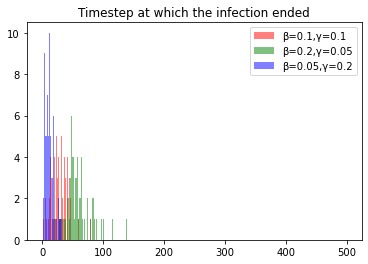

In [11]:
# Average nodes infected at each timestep for each set of runs
def arow(row):
#     print(row, list(row).count("I"))
    return row.value_counts().get("I", 0) # + row.value_counts().get("R", 0)

colors = ['r', 'g', 'b']

# for i, (t100, (beta, gamma)) in enumerate(zip([runsa, runsb, runsc], [(0.1, 0.1), (0.2, 0.05), (0.05, 0.2)])):
#     rows = [np.array(t500.apply(arow, axis=1)) for t500 in t100]
#     infected = pd.DataFrame(rows, columns=list(range(len(rows[0]))))
#     m = infected.mean()
# #     print(m)
#     plt.bar(np.arange(501), m, alpha=0.5, color=colors[i], label=f"β={beta},γ={gamma}")
    
# plt.legend(loc='upper right')
# plt.title("Average number of infected at each timestep")
# plt.show()

def when_end(t500):
    for i, (_, row) in enumerate(t500.iterrows()):
        if row.value_counts().get("I", 0) == 0:
#             print(i, row.value_counts())
            return i
    return 501

for i, (t100, (beta, gamma)) in enumerate(zip([runsa, runsb, runsc], [(0.1, 0.1), (0.2, 0.05), (0.05, 0.2)])):
    rows = [when_end(t500) for t500 in t100]
    plt.hist(rows, np.arange(501), alpha=0.5, color=colors[i], label=f"β={beta},γ={gamma}")
    
plt.legend(loc='upper right')
plt.title("Timestep at which the infection ended")
plt.show()

** Part G: **

Create a line graph with three lines showing the average number of time steps spent infected for each node.  The lines will have an x-axis of the index of each node and a y-axis of the average number of time steps spent infected.  There should be one line per pair of $\beta, \gamma$ values.

Sanity check: for the 3 nodes that start as infected, explain approximately what should this number be in terms of the distributions discussed in the class.

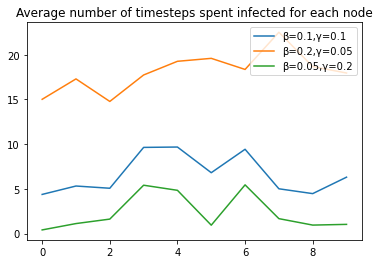

In [12]:
atime = [[],[],[]]

for node in range(10):
    for i, (t100, (beta, gamma)) in enumerate(zip([runsa, runsb, runsc], [(0.1, 0.1), (0.2, 0.05), (0.05, 0.2)])):
        c = [arow(t500[node]) for t500 in t100]
        
        c = np.array(c)
        atime[i].append(c.mean())
    
for s, (beta, gamma) in zip(atime, [(0.1, 0.1), (0.2, 0.05), (0.05, 0.2)]):
    plt.plot(s, label=f"β={beta},γ={gamma}")
plt.legend(loc='upper right')
plt.title("Average number of timesteps spent infected for each node")
plt.show()
        

**Part H: **

Comment on anything you found interesting or unusual.

For all of the cases we tested, the number of infections reached 0 (all recovered or susceptible) on average after 100 timesteps, with the longest infections ending not long after 200.

Computational epidemiology is a huge field, and models can add all kinds of added components: nodes could be surfaces *or* people, graphs could be representing cities or communities instead of individuals, etc.  One similar model is used instead for diseases that don't ever have **R** states: nodes just transition from **I** to **S** because there may be no long-term immunity after infection.

If you're ever interested in learning more about computational epidemiology, CU-Boulder has a couple of world experts in network-based epidemology and computational public health.  Check our course offerings by Aaron Clauset and Dan Larremore for great opportunities to do these sorts of things in a more advanced setting.

<br>

---
[Back to top](#top)
<a id='bot'></a>